# Exercise - Network for Logic Gate AND

Goal: Implement a simple network to simulate logic gate AND
- Use binary inputs

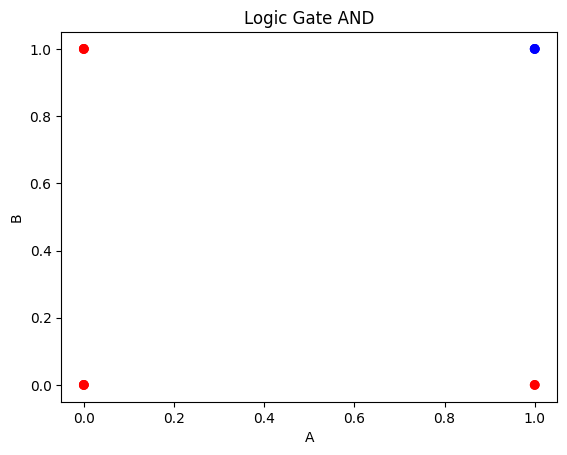

In [1]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt

x = np.array([[0, 0], 
     [1, 0], 
     [0, 1], 
     [1, 1],
     [0, 0],
     [1, 0], 
     [0, 1], 
     [1, 1],
     [0, 0], 
     [0, 1], 
     [1, 1]])

y = np.array([0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1])

colors = ['blue' if label == 1 else 'red' for label in y]

plt.scatter(x[:,0], x[:, 1] , c=colors)
plt.xlabel("A")
plt.ylabel("B")
plt.title("Logic Gate AND")
plt.show()

In [2]:
inputs = keras.Input(shape=(2,), name="inputLayer")
outputs = layers.Dense(1, activation="sigmoid", name="output")(inputs)
model = keras.Model(inputs=inputs, outputs=outputs, name="AND_Network")
model.summary()

Model: "AND_Network"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (InputLayer)     [(None, 2)]               0         
                                                                 
 output (Dense)              (None, 1)                 3         
                                                                 
Total params: 3 (12.00 Byte)
Trainable params: 3 (12.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [3]:
optimizer = Adam(learning_rate=0.1)
model.compile(optimizer=optimizer,
               loss="binary_crossentropy",
               metrics=["accuracy"])

history = model.fit(x=x, y=y, epochs=30)

Epoch 1/30
1/1 [==============================] - 0s 333ms/step - loss: 0.6996 - accuracy: 0.5455
Epoch 2/30
1/1 [==============================] - 0s 4ms/step - loss: 0.6715 - accuracy: 0.5455
Epoch 3/30
1/1 [==============================] - 0s 12ms/step - loss: 0.6449 - accuracy: 0.5455
Epoch 4/30
1/1 [==============================] - 0s 10ms/step - loss: 0.6196 - accuracy: 0.8182
Epoch 5/30
1/1 [==============================] - 0s 11ms/step - loss: 0.5957 - accuracy: 0.8182
Epoch 6/30
1/1 [==============================] - 0s 13ms/step - loss: 0.5731 - accuracy: 0.8182
Epoch 7/30
1/1 [==============================] - 0s 12ms/step - loss: 0.5516 - accuracy: 0.8182
Epoch 8/30
1/1 [==============================] - 0s 8ms/step - loss: 0.5310 - accuracy: 0.8182
Epoch 9/30
1/1 [==============================] - 0s 4ms/step - loss: 0.5114 - accuracy: 0.8182
Epoch 10/30
1/1 [==============================] - 0s 12ms/step - loss: 0.4927 - accuracy: 0.8182
Epoch 11/30
1/1 [==============

Weights Vector:
 [[2.228498 ]
 [1.5250778]] 
 Bias: 
 [-2.727719]


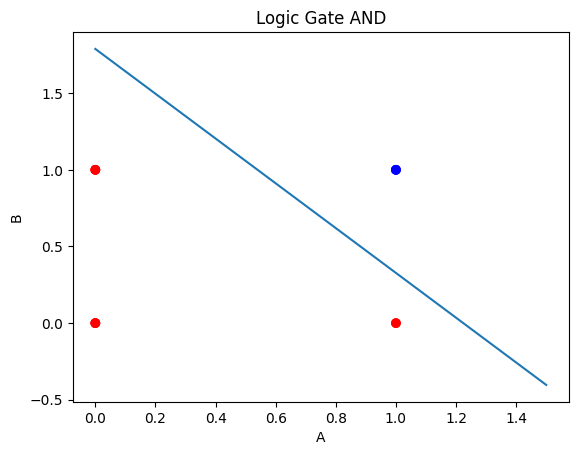

In [9]:
weights = model.layers[1].get_weights()

print(f"Weights Vector:\n {weights[0]} \n Bias: \n {weights[1]}")

x_1 = np.linspace(0, 1.5, 100)
x_2 = -(x_1 * weights[0][0] + weights[1][0])/(weights[0][1])

plt.plot(x_1, x_2)
plt.scatter(x[:,0], x[:, 1] , c=colors)
plt.xlabel("A")
plt.ylabel("B")
plt.title("Logic Gate AND")
plt.show()


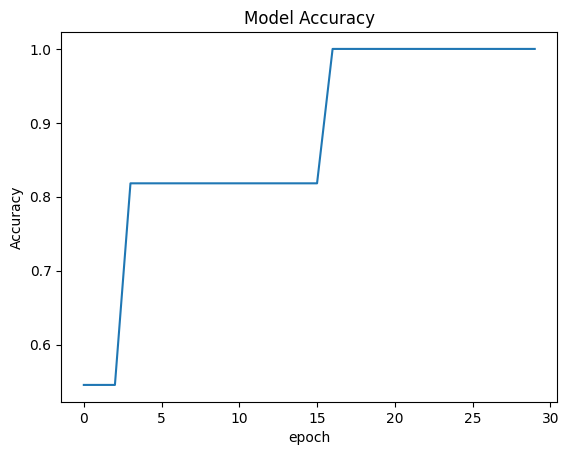

In [10]:
plt.plot(history.history["accuracy"])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("epoch")
plt.show()

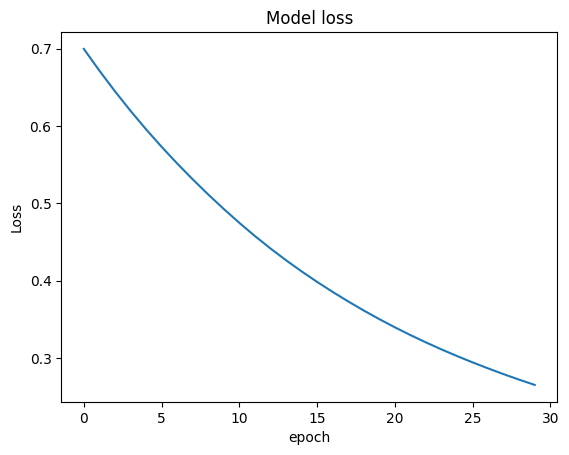

In [11]:
plt.plot(history.history["loss"])
plt.title("Model loss")
plt.ylabel("Loss")
plt.xlabel("epoch")
plt.show()

In [15]:
xTest = np.array([[0, 0],
                  [0, 1],
                  [1, 0],
                  [1, 1]])

yPred = model.predict(x=xTest)

print(f"yPred Probabilite to be 1: \n {yPred}")

yPred = np.round(yPred)

print(f"yPred = \n {yPred}")

1/1 [==============================] - 0s 21ms/step
yPred Probabilite to be 1: 
 [[0.0613574 ]
 [0.23100567]
 [0.37772375]
 [0.7361118 ]]
yPred = 
 [[0.]
 [0.]
 [0.]
 [1.]]
